# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### Load data

In [2]:
# Load the data file into a DataFrame
data= pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


There are some missing values and inappropriate data types. 

date_posted column should be datetime64 type and model_year could be an int64 type instead of float64

Just a few columns have missing values. Most of the missing values are in is_4wd column which(I believe) indicates the car is 2wd. Paint_color column is 2nd to have most missing values. 

### Conclusions and further steps


date_posted column should be treated to change its type. I will try to fill in the missing values with appropriate data.  I don't think we can fill the missing values in paint_color column.

## Treat missing values (if any)

In [5]:
data.isna().sum()*100/len(data)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [6]:
data.duplicated().sum()

0

In [7]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [8]:
data['odometer'].fillna((data['date_posted'].dt.year - data['model_year']) * 15000, inplace=True)

In [9]:
data['is_4wd'].fillna('0', inplace=True)

In [10]:
data['paint_color'].fillna('unknown', inplace=True)

The missing values in is_4wd column means the car is not 4wd. I don't think we would be able to fill in missing colors or model years as we don't have the information and dropping would cause missing an important chunk of information. 
I will replace the missing values in odometer column with average mileage per year, which is 15000 found by the descibe() method, multiplied by the age of the car when the ad is placed.



## Fix data types

In [11]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [12]:
data=data.astype({'is_4wd': 'int64'})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      50976 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


## Enrich data

In [15]:
# Add the vehicle's age when the ad was placed
data['vehicle_age']= data['date_posted'].dt.year - data['model_year'] +1



In [16]:
# Add the vehicle's average mileage per year
data['ave_mileage']= data['odometer'] // data['vehicle_age']


In [17]:
#replacing the inf values with NaN
list=['ave_mileage', 'model_year', 'vehicle_age']
for i in list:
    data[i].replace([np.inf,-np.inf], np.nan, inplace=True)

In [18]:
# It might help to replace the condition values with something that can be manipulated more easily
def condition_types(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    else:
        return 0 


In [19]:
data['condition'] = data['condition'].apply(condition_types)

## Check clean data

In [20]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      50976 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  vehicle_age   47906 non-null  float64       
 14  ave_mileage   47906 non-null  float64       
dtypes: datetime64[ns](1), float64(5), in

In [21]:
data['cylinders'].fillna(data.groupby('model')['cylinders'].transform('median'),inplace=True)

In [22]:
# print a sample of data
data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,ave_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,8.0,18125.0
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,NaN,NaN
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,7.0,15714.0
3,1500,2003.0,ford f-150,1,8.0,gas,240000.0,automatic,pickup,unknown,0,2019-03-22,9,17.0,14117.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,3.0,26967.0
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,5.0,11590.0
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,4.0,19803.0
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,7.0,15639.0
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,7.0,14882.0
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,12.0,12265.0


## Study core parameters
The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

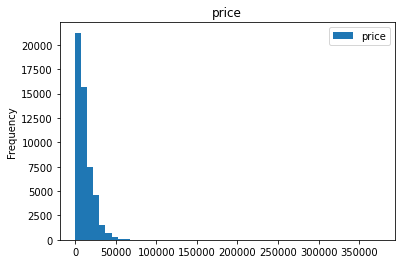

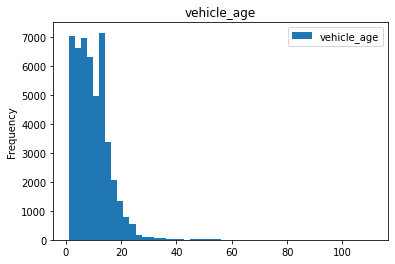

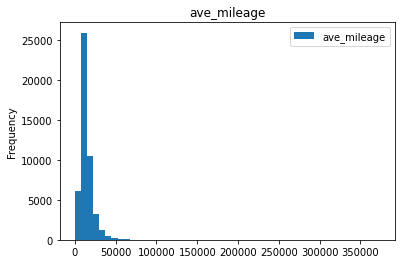

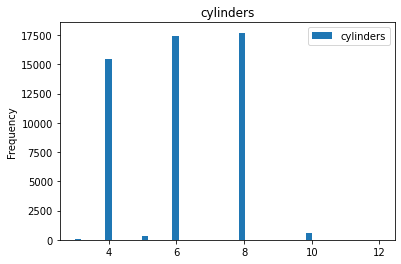

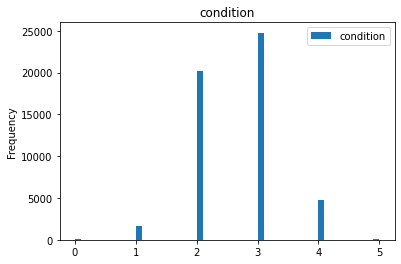

In [23]:
columns =['price','vehicle_age','ave_mileage','cylinders','condition']
for i in columns:
    data.plot(y=i, kind='hist', bins=50, title=i)
plt.show()

## Study and treat outliers
Based on the histograms, price, ave_mileage, and vehicle_age columns seem to have outliers.

In [24]:
# Determine the lower limits for outliers
data.quantile(0.25)


price           5000.00
model_year      2006.00
condition          2.00
cylinders          4.00
odometer       68911.00
is_4wd             0.00
days_listed       19.00
vehicle_age        5.00
ave_mileage     9930.75
Name: 0.25, dtype: float64

In [25]:
# Determine the upper limits for outliers
data.quantile(0.75)


price           16839.0
model_year       2014.0
condition           3.0
cylinders           8.0
odometer       158000.0
is_4wd              1.0
days_listed        53.0
vehicle_age        13.0
ave_mileage     16764.0
Name: 0.75, dtype: float64

In [26]:
# Store data without outliers in a separate DataFrame
data_outliers = data.query('5000 <= price <= 16839.0  and 4.0 <= vehicle_age <= 12.0 and 11398.25 <= ave_mileage <= 19721.25')


## Study core parameters without outliers

Removing outliers shows the distribution of data more clearly and accurately while creating a strong correlation. 

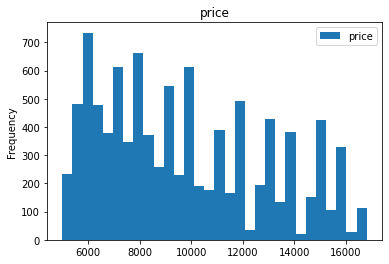

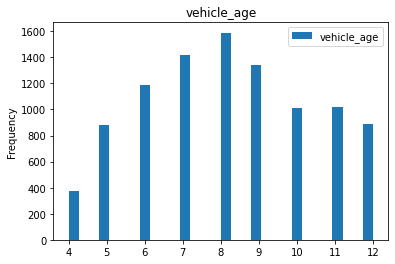

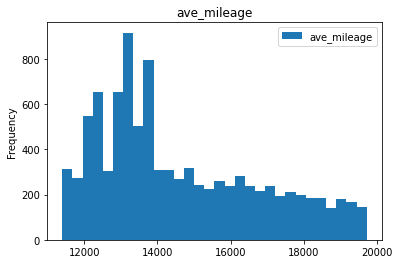

In [27]:
columns =['price','vehicle_age','ave_mileage']
for i in columns:
    data_outliers.plot(y=i, kind='hist', bins=30, title=i)
plt.show()

## Ads lifetime

The typical lifetime of an ad is usually around 30-36 days, anything below 10-15 days should be  considered too quickly as it wouldn't catch enough customers eye. More than 55 days is too long as customers will be bored of repetetiveness and will need a change of creative. 

In [28]:
data['days_listed'].mean()

39.55475982532751

In [29]:
data['days_listed'].median()

33.0

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

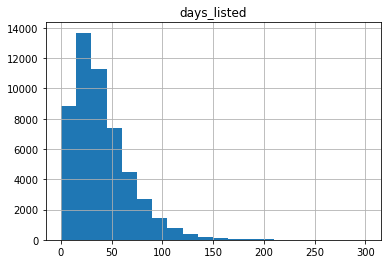

In [30]:
data.hist('days_listed', bins=20, range=(0,300))

## Average price per each type of vehicle

In [31]:
#Average price for each type of vehicle
data_outliers.pivot_table(index='type', values='price').sort_values(by='price', ascending=False)

,price
type,
truck,11972.755583
offroad,11970.000000
pickup,11460.125461
convertible,11210.787234
coupe,9984.122172
SUV,9923.361625
other,9145.396552
wagon,9073.951777
van,8964.713287


In [32]:
#Number of ads for each type of vehicle
data_outliers.groupby('type')['days_listed'].count()

type
SUV            3028
convertible      47
coupe           221
hatchback       250
mini-van        291
offroad          15
other            58
pickup          813
sedan          2828
truck          1612
van             143
wagon           394
Name: days_listed, dtype: int64

In [33]:
ads_and_type=data_outliers.pivot_table(index='type',values='days_listed', aggfunc='count').sort_values(by='days_listed', ascending=False)

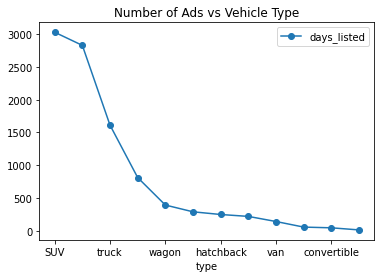

In [34]:
ads_and_type.plot(title='Number of Ads vs Vehicle Type', style='o-')
plt.show()

SUV and sedan are the types that has the greatest number of ads placed for. 

## Price factors

In [35]:
data_filtered = data_outliers.query('type == "SUV" or type == "sedan"')
data_new = data_filtered[['type','ave_mileage', 'vehicle_age', 'condition','price']]
                         

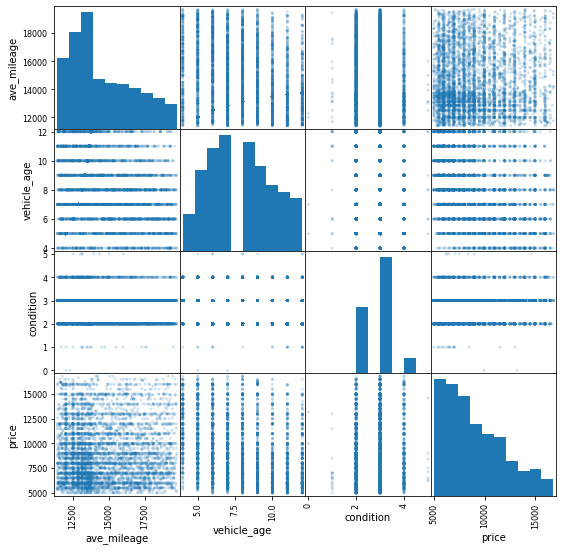

In [36]:
pd.plotting.scatter_matrix(data_new, figsize=(9, 9), alpha=0.2) 
plt.show()

In [37]:
#Removing categories with less than 50 ads as they wouldn't be valid for analysis
data_ads = data_outliers.groupby('paint_color')['days_listed'].count()
data_ads = data_ads[data_ads < 50]
data_ads

paint_color
orange    31
purple    15
yellow    18
Name: days_listed, dtype: int64

In [38]:
data_temp=data_outliers.query('paint_color != "yellow" and paint_color != "orange" and paint_color != "purple"')
data_temp

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,ave_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,8.0,18125.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,7.0,15714.0
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,5.0,11590.0
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,7.0,15639.0
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,7.0,14882.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,4,4.0,gas,111088.0,automatic,SUV,unknown,0,2019-04-01,175,9.0,12343.0
51509,5980,2010.0,subaru impreza,3,4.0,gas,121778.0,manual,hatchback,white,1,2019-01-10,8,10.0,12177.0
51516,8999,2011.0,jeep grand cherokee,2,6.0,gas,105000.0,automatic,SUV,white,1,2018-11-01,51,8.0,13125.0
51520,9249,2013.0,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,6.0,14689.0


In [39]:
data_filtered_2 = data_outliers[['price', 'transmission', 'paint_color']]

In [40]:
data_filtered_2

,price,transmission,paint_color
0,9400,automatic,unknown
2,5500,automatic,red
5,14990,automatic,black
7,15990,automatic,black
8,11500,automatic,unknown
...,...,...,...
51502,7995,automatic,unknown
51509,5980,manual,white
51516,8999,automatic,white
51520,9249,automatic,black


<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

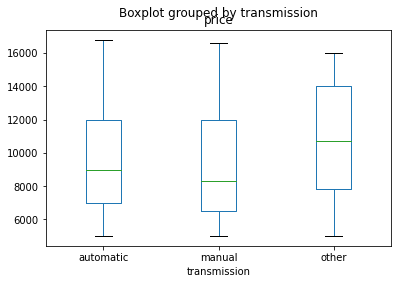

In [41]:
data_filtered_2.boxplot(by ='transmission', column =['price'], grid = False)

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

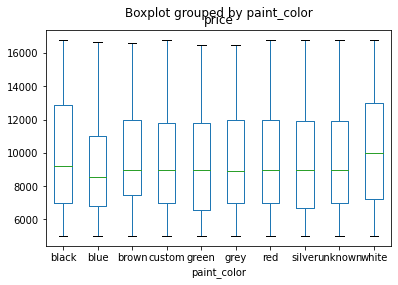

In [42]:
data_temp.boxplot(by ='paint_color', column =['price'], grid = False)

## General conclusion

To clean the data, duplicates were checked but found none. Missing values in odometer column was replaced with the median which is 15000. Data types were fixed from object to datetime. Ave_mileage and vehicle age columns were created to be able work easily with the data. Histograms were plotted for core parameters and detected outliers was removed to have clean distribution of the data. The number of ads and the average price for each type of vehicle were analyzed. Two types with the greatest number of ads was found to be SUV and sedan followed by trucks. As the mileage and age of the car increases, price also increases. The cars in excellent condition seems to be higher in price but it could be due to data having larger number of excellent condition cars compared to cars in like new or new condition. Automatic transmission cars tend to go a little higher in price in average than the manual transmission cars. The color of the car doesn't seem †o be effective in determining the price except for white and black cars which get more demand.